# Support Vector Machine Classifier 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler # For scaling to unit scale, before PCA application
from sklearn.decomposition import PCA # For PCA dimensionality reduction technique
import matplotlib.pyplot as plt # MatPlotLib for graphing data visually. Seaborn more likely to be used.
from sklearn.preprocessing import LabelBinarizer # For converting categorical data into numeric, for modeling stage
from sklearn.model_selection import StratifiedKFold # For optimal train_test splitting, for model input data
from sklearn.model_selection import train_test_split # For basic dataset splitting
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors ML classifier (default n. of neighbors = 5)
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix # For plotting confusion matrices
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score # For getting the accuracy of a model's predictions
from sklearn.metrics import classification_report # Various metrics for model performance
import warnings
warnings.filterwarnings('ignore')

# Useful environment variables

In [2]:
# 'Reduced dimensions' variable for altering the number of PCA principal components. Can be altered for needs.
# Only 7 principal components needed when using non-normalised PCA dataset.
dimensions_num_for_PCA = 7

# Max number of permutations to run. Can be altered for needs.
number_of_permutations = 100

# 10 folds is usually the heuristic to follow for larger datasets of around this size.
num_of_splits_for_skf = 10
# Seed value to pass into models so that repeated runs result in the same output
seed_val = 1

# Number of statistical distance measures to run (for the results, columns section)
num_of_statistical_dist_measures = 6

In [3]:
def get_PCA_feature_names(num_of_pca_components):
    feature_names = []
    for i in range(num_of_pca_components):    
        feature_names.append(f"Principal component {i+1}")
    return feature_names

In [4]:
# See documentation above to understand what each step does, and why.
def train_model_predict(model, model_name, X, y, skf):
    for train_index, test_index in skf.split(X, y): # 1)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] # 2)
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        reshaped_y_train = np.asarray(y_train).reshape(-1, 1) # 3)
        reshaped_y_test = np.asarray(y_test).reshape(-1, 1)
        
    model.fit(X_train, reshaped_y_train.ravel()) # 4)
    pred_y = model.predict(X_test) # 5)
    score = classification_report(reshaped_y_test, pred_y) # 6)
    print('Classification report: \n', score, '\n')
    plot_confusion_matrix(reshaped_y_test, pred_y, title='Confusion Matrix for {}'.format(model_name))
        
    return accuracy_score(reshaped_y_test, pred_y), X_train, X_test, y_train, pred_y

In [5]:
data=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [6]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [8]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [9]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
data.dtypes

destination_port                 int64
flow_duration                    int64
total_fwd_packets                int64
total_backward_packets           int64
total_length_of_fwd_packets      int64
                                ...   
idle_mean                      float64
idle_std                       float64
idle_max                         int64
idle_min                         int64
label                           object
Length: 79, dtype: object

# Fixing issues with ScikitLearn's PCA transform on this dataset

In [11]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep]

In [12]:
data_cleaned = data.copy()
data_cleaned = clean_dataset(data_cleaned) # see methods at top of notebook
data_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [58]:
data_cleaned = data_cleaned.reset_index()
# Removing un-needed index column added by reset_index method
data_cleaned.drop('index', axis=1, inplace=True)
data_cleaned.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Considerations before PCA can be used correctly (before Data Preparation feature selection via PCA)

In [57]:
data.columns.tolist()

['destination_port',
 'flow_duration',
 'total_fwd_packets',
 'total_backward_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_max',
 'fwd_packet_length_min',
 'fwd_packet_length_mean',
 'fwd_packet_length_std',
 'bwd_packet_length_max',
 'bwd_packet_length_min',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'flow_bytes/s',
 'flow_packets/s',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'fwd_iat_total',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_total',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'fwd_psh_flags',
 'bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'fwd_header_length',
 'bwd_header_length',
 'fwd_packets/s',
 'bwd_packets/s',
 'min_packet_length',
 'max_packet_length',
 'packet_length_mean',
 'packet_length_std',
 'packet_length_variance',
 'fin_flag_count',
 'syn_flag_count',
 'rst_flag_count',
 'psh_flag_count',
 'ack_flag_count',
 'ur

In [15]:
# Saving the label attribute before dropping it.
data_labels = data_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
data_labels.unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [52]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
data_no_labels = data_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
data_features = data_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
data_no_labels.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


# Using StandardScaler to transform features into unit scale (optional for PCA)

In [51]:
data_no_labels.describe().T

,count,mean,std,min,25%,50%,75%,max
destination_port,225711.0,8.876557e+03,1.975202e+04,0.0,80.0,80.0,80.0,65532.0
flow_duration,225711.0,1.624410e+07,3.152612e+07,-1.0,71238.0,1453164.0,8806652.0,119999937.0
total_fwd_packets,225711.0,4.875389e+00,1.542399e+01,1.0,2.0,3.0,5.0,1932.0
total_backward_packets,225711.0,4.573424e+00,2.175693e+01,0.0,1.0,4.0,5.0,2942.0
total_length_of_fwd_packets,225711.0,9.396031e+02,3.249628e+03,0.0,26.0,30.0,64.0,183012.0
...,...,...,...,...,...,...,...,...
active_min,225711.0,1.776468e+05,7.843163e+05,0.0,0.0,0.0,1863.0,100000000.0
idle_mean,225711.0,1.032370e+07,2.185431e+07,0.0,0.0,0.0,8241416.5,120000000.0
idle_std,225711.0,3.612487e+06,1.275778e+07,0.0,0.0,0.0,0.0,65300000.0
idle_max,225711.0,1.288007e+07,2.692283e+07,0.0,0.0,0.0,8254451.5,120000000.0


In [18]:
print(np.any(np.isnan(data_no_labels)))

print(np.any(np.isfinite(data_no_labels)))

False
True


In [19]:
final=data_no_labels.replace([np.inf, -np.inf], np.nan)

In [20]:
final.dropna(inplace=True)


In [21]:
print(np.any(np.isnan(final)))
print(np.all(np.isfinite(final)))

False
True


In [49]:
data_scaled = StandardScaler().fit_transform(final.select_dtypes(include=['float64','int64']))
# Converting back to dataframe
data_scaled = pd.DataFrame(data = data_scaled, columns = data_features)
data_scaled.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,2.328296,-0.515259,-0.186424,-0.210206,-0.285450,-0.151994,-0.285699,-0.133993,-0.314602,-0.269528,...,-0.188408,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105
1,2.337865,-0.515256,-0.251258,-0.164243,-0.287296,-0.151841,-0.285699,-0.133993,-0.314602,-0.269528,...,-0.269902,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105
2,2.337915,-0.515258,-0.251258,-0.164243,-0.287296,-0.151841,-0.285699,-0.133993,-0.314602,-0.269528,...,-0.269902,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105
3,1.891428,-0.515258,-0.251258,-0.164243,-0.287296,-0.151841,-0.285699,-0.133993,-0.314602,-0.269528,...,-0.269902,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105
4,2.328195,-0.515259,-0.186424,-0.210206,-0.285450,-0.151994,-0.285699,-0.133993,-0.314602,-0.269528,...,-0.188408,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105


# Plotting principle component variance

####  The plot below shows that using the first 30 PCA components actually describes most/ all (99.9%) of the variation (information) within the Normalised dataset. This is a huge dimension reduction from the initial 78 features, down to just 30.

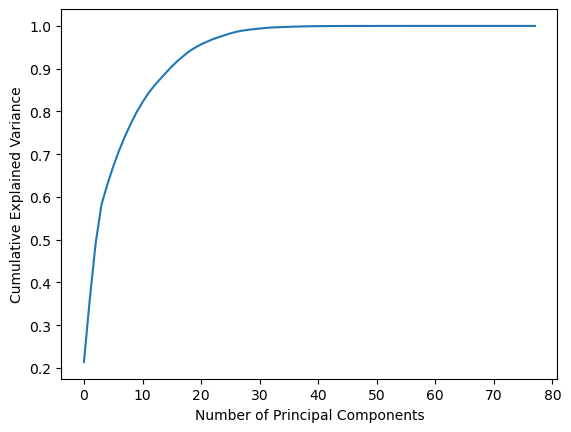

In [23]:
pca_test = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

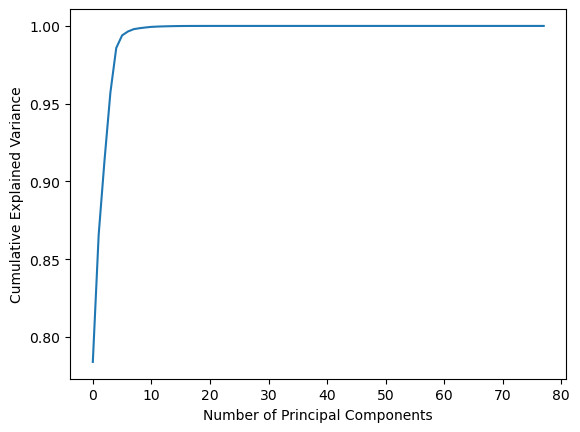

In [24]:
# The df_no_labels dataset holds the un-normalised dataset.
pca_test = PCA().fit(data_no_labels)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Important note on these above scree plot results 

# Now fitting and transforming the data with PCA

In [25]:
pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(data_no_labels).transform(data_no_labels)
principal_components

array([[-36323170.75221933,   -177588.42379816,   -158328.26233237, ...,
          -644672.42220481,    -65463.38947675,  -2488348.84682627],
       [-36305977.61597575,   -175956.55763887,   -146308.36010378, ...,
          -660559.72499715,    -66403.65570307,  -2500577.99194553],
       [-36306554.47043557,   -176002.19390316,   -146668.43686064, ...,
          -660076.49664592,    -66383.89601926,  -2500177.97878299],
       ...,
       [-36306224.49924966,   -175972.74488201,   -146454.00168462, ...,
          -660364.98372573,    -66399.86005612,  -2500414.19645555],
       [-36306601.54189704,   -176009.63622596,   -146737.01404195, ...,
          -659998.75022878,    -66339.92085466,  -2500140.93079303],
       [-36306302.89020049,   -175977.93162256,   -146503.71850961, ...,
          -660296.90080769,    -66396.91896142,  -2500356.50403241]])

# Getting Principal Component feature names, dynamically

In [26]:
# See Methods at the top of the notebook
principal_component_headings = get_PCA_feature_names(dimensions_num_for_PCA)

In [27]:
data_pc = pd.DataFrame(data = principal_components, columns = principal_component_headings)
data_pc

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7
0,-3.632317e+07,-177588.423798,-158328.262332,3.274166e+06,-644672.422205,-65463.389477,-2.488349e+06
1,-3.630598e+07,-175956.557639,-146308.360104,-6.182039e+05,-660559.724997,-66403.655703,-2.500578e+06
2,-3.630655e+07,-176002.193903,-146668.436861,-4.974704e+05,-660076.496646,-66383.896019,-2.500178e+06
3,-3.630711e+07,-176054.438478,-147043.488746,-3.752421e+05,-659575.485264,-66353.363288,-2.499773e+06
4,-3.632317e+07,-177588.424395,-158328.262578,3.274166e+06,-644672.421279,-65463.388671,-2.488349e+06
...,...,...,...,...,...,...,...
225706,-3.630640e+07,-175986.939817,-146564.360752,-5.315339e+05,-660217.323093,-66393.258881,-2.500293e+06
225707,-3.630626e+07,-175975.278900,-146473.928435,-5.616025e+05,-660338.262449,-66398.743473,-2.500392e+06
225708,-3.630622e+07,-175972.744882,-146454.001685,-5.682723e+05,-660364.983726,-66399.860056,-2.500414e+06
225709,-3.630660e+07,-176009.636226,-146737.014042,-4.781892e+05,-659998.750229,-66339.920855,-2.500141e+06


In [28]:
data_final = pd.concat([data_pc, data_labels], axis = 1)
# Scroll to the RHS end of dataframe to see attached label feature
data_final

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,label
0,-3.632317e+07,-177588.423798,-158328.262332,3.274166e+06,-644672.422205,-65463.389477,-2.488349e+06,BENIGN
1,-3.630598e+07,-175956.557639,-146308.360104,-6.182039e+05,-660559.724997,-66403.655703,-2.500578e+06,BENIGN
2,-3.630655e+07,-176002.193903,-146668.436861,-4.974704e+05,-660076.496646,-66383.896019,-2.500178e+06,BENIGN
3,-3.630711e+07,-176054.438478,-147043.488746,-3.752421e+05,-659575.485264,-66353.363288,-2.499773e+06,BENIGN
4,-3.632317e+07,-177588.424395,-158328.262578,3.274166e+06,-644672.421279,-65463.388671,-2.488349e+06,BENIGN
...,...,...,...,...,...,...,...,...
225706,-3.630640e+07,-175986.939817,-146564.360752,-5.315339e+05,-660217.323093,-66393.258881,-2.500293e+06,BENIGN
225707,-3.630626e+07,-175975.278900,-146473.928435,-5.616025e+05,-660338.262449,-66398.743473,-2.500392e+06,BENIGN
225708,-3.630622e+07,-175972.744882,-146454.001685,-5.682723e+05,-660364.983726,-66399.860056,-2.500414e+06,BENIGN
225709,-3.630660e+07,-176009.636226,-146737.014042,-4.781892e+05,-659998.750229,-66339.920855,-2.500141e+06,BENIGN


In [29]:
lb = LabelBinarizer()
data_final['label'] = lb.fit_transform(data_final['label'])
data_final

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,label
0,-3.632317e+07,-177588.423798,-158328.262332,3.274166e+06,-644672.422205,-65463.389477,-2.488349e+06,0
1,-3.630598e+07,-175956.557639,-146308.360104,-6.182039e+05,-660559.724997,-66403.655703,-2.500578e+06,0
2,-3.630655e+07,-176002.193903,-146668.436861,-4.974704e+05,-660076.496646,-66383.896019,-2.500178e+06,0
3,-3.630711e+07,-176054.438478,-147043.488746,-3.752421e+05,-659575.485264,-66353.363288,-2.499773e+06,0
4,-3.632317e+07,-177588.424395,-158328.262578,3.274166e+06,-644672.421279,-65463.388671,-2.488349e+06,0
...,...,...,...,...,...,...,...,...
225706,-3.630640e+07,-175986.939817,-146564.360752,-5.315339e+05,-660217.323093,-66393.258881,-2.500293e+06,0
225707,-3.630626e+07,-175975.278900,-146473.928435,-5.616025e+05,-660338.262449,-66398.743473,-2.500392e+06,0
225708,-3.630622e+07,-175972.744882,-146454.001685,-5.682723e+05,-660364.983726,-66399.860056,-2.500414e+06,0
225709,-3.630660e+07,-176009.636226,-146737.014042,-4.781892e+05,-659998.750229,-66339.920855,-2.500141e+06,0


In [30]:
print("Before LabelBinarizer: ", data_labels.unique())
print("After LabelBinarizer: ", data_final['label'].unique())

Before LabelBinarizer:  ['BENIGN' 'DDoS']
After LabelBinarizer:  [0 1]


In [31]:
# Separating the label so that the answers aren't provided to the model, in training.
X = data_final.drop(['label'], axis = 1)
y = data_final['label']
y

0         0
1         0
2         0
3         0
4         0
         ..
225706    0
225707    0
225708    0
225709    0
225710    0
Name: label, Length: 225711, dtype: int32

In [32]:
skf = StratifiedKFold(n_splits=num_of_splits_for_skf, shuffle=False)
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [33]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    reshaped_y_train = np.asarray(y_train).reshape(-1, 1)
    reshaped_y_test = np.asarray(y_test).reshape(-1, 1)
    
print( 'X_train length: ', len(X_train) ) # To check if splits worked
print( 'y_train length: ', len(y_train) )
print( 'X_test length: ', len(X_test) )
print( 'y_test length: ', len(y_test) )

X_train length:  203140
y_train length:  203140
X_test length:  22571
y_test length:  22571


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform',
                                    algorithm='auto', leaf_size=30,
                                    p=2, metric='minkowski',
                                    metric_params=None, n_jobs=None)

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9768
           1       0.99      0.99      0.99     12803

    accuracy                           0.99     22571
   macro avg       0.99      0.99      0.99     22571
weighted avg       0.99      0.99      0.99     22571
 

Model accuracy=  99.24682114217359 %

Dataset labels:  ['BENIGN' 'DDoS']
Dataset numeric labels after encoding for model:  [0 1]


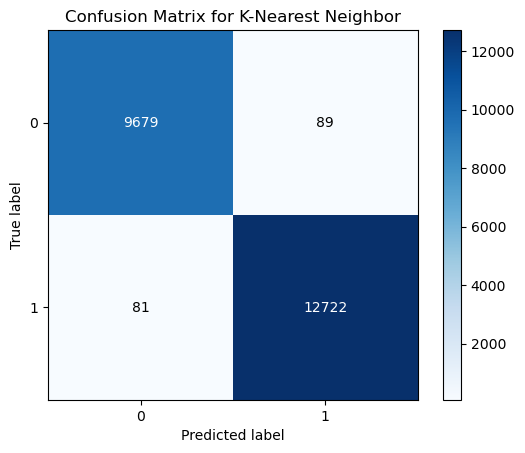

In [35]:
# Unpacking the method return values. Last 4 are needed for statistical distance measure methods.
accuracy, X_train, X_test, y_train, pred_y = train_model_predict(knn_model, "K-Nearest Neighbor", X, y, skf)
print("Model accuracy= ", accuracy*100, "%\n")
print("Dataset labels: ", data_labels.unique())
print("Dataset numeric labels after encoding for model: ", data_final['label'].unique())

# Downsample the data

In [36]:
data_bening=data_final[data_final['label']==0]
data_ddos=data_final[data_final['label']==1]

In [37]:
data_bening.head()

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,label
0,-3.632317e+07,-177588.423798,-158328.262332,3.274166e+06,-644672.422205,-65463.389477,-2.488349e+06,0
1,-3.630598e+07,-175956.557639,-146308.360104,-6.182039e+05,-660559.724997,-66403.655703,-2.500578e+06,0
2,-3.630655e+07,-176002.193903,-146668.436861,-4.974704e+05,-660076.496646,-66383.896019,-2.500178e+06,0
3,-3.630711e+07,-176054.438478,-147043.488746,-3.752421e+05,-659575.485264,-66353.363288,-2.499773e+06,0
4,-3.632317e+07,-177588.424395,-158328.262578,3.274166e+06,-644672.421279,-65463.388671,-2.488349e+06,0


#### Now Downsample the BENING 

In [38]:
data_bening_downsample=resample(data_bening,replace=False,n_samples=1000,random_state=42)
len(data_bening_downsample)

1000

#### Now Downsample the DDoS 

In [39]:
data_ddos_downsample=resample(data_ddos,replace=False,n_samples=1000,random_state=42)
len(data_ddos_downsample)

1000

In [40]:
data_downsample=pd.concat([data_bening_downsample,data_ddos_downsample])
len(data_downsample)

2000

# Split the Data into Dependant and Independant Variables

In [41]:
X=data_downsample.drop('label',axis=1)
X.head()

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7
220848,-3.630645e+07,-1.760138e+05,-1.466495e+05,-510029.525783,-6.600966e+05,-6.631578e+04,-2.500217e+06
32296,1.644093e+08,4.367253e+07,4.975101e+07,396330.795425,-1.980201e+07,-1.041947e+07,-5.097850e+05
9600,-3.614309e+07,-1.878289e+05,-1.894866e+05,-727890.982448,-6.371858e+05,3.537498e+04,-2.498212e+06
14839,-3.631162e+07,-1.765477e+05,-1.504756e+05,709841.308546,-6.550667e+05,-6.602006e+04,-2.494796e+06
59402,-3.625256e+07,-1.830455e+05,-1.604578e+05,-724075.368667,-6.512073e+05,-5.667468e+04,-2.505729e+06


In [42]:
y=data_downsample['label']
y.head()

220848    0
32296     0
9600      0
14839     0
59402     0
Name: label, dtype: int32

In [43]:
X_train,X_test,y_train, y_test = train_test_split(
...     X,y,test_size=0.30,random_state=42)
print(f'X_train:{len(X_train)}\ny_train:{len(y_train)}\nX_test:{len(X_test)}\ny_test:{len(y_test)}')

X_train:1400
y_train:1400
X_test:600
y_test:600


# Build A Preliminary Support Vector Machine

In [44]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       100
           1       0.92      0.72      0.81       100

    accuracy                           0.83       200
   macro avg       0.85      0.83      0.83       200
weighted avg       0.85      0.83      0.83       200
 

Model accuracy=  83.0 %

Dataset labels:  ['BENIGN' 'DDoS']
Dataset numeric labels after encoding for model:  [0 1]


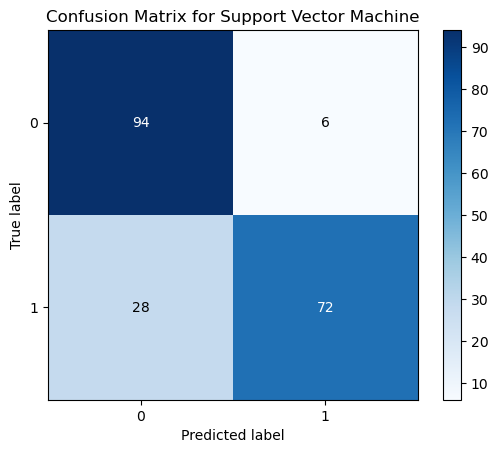

In [45]:
accuracy, X_train, X_test, y_train, pred_y = train_model_predict(clf_svm, "Support Vector Machine", X, y, skf)
print("Model accuracy= ", accuracy*100, "%\n")
print("Dataset labels: ", data_labels.unique())
print("Dataset numeric labels after encoding for model: ", data_downsample['label'].unique())

# Optimize parameters with Cross Validation and GridSeachCV()

In [46]:
param_grid=[{'C':[0.5,1,10,100],# Note:value for c must be>0
            'gamma':['scale',1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}]
optimal_params=GridSearchCV(SVC(),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=0)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


# Building,Evaluating .Drawing and Interpreting the Final Support Vector Machine

In [47]:
clf_svm=SVC(random_state=42,C=100,gamma='scale')
clf_svm.fit(X_train,y_train)

SVC(C=100, random_state=42)

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       100
           1       0.93      0.97      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200
 

Model accuracy=  95.0 %

Dataset labels:  ['BENIGN' 'DDoS']
Dataset numeric labels after encoding for model:  [0 1]


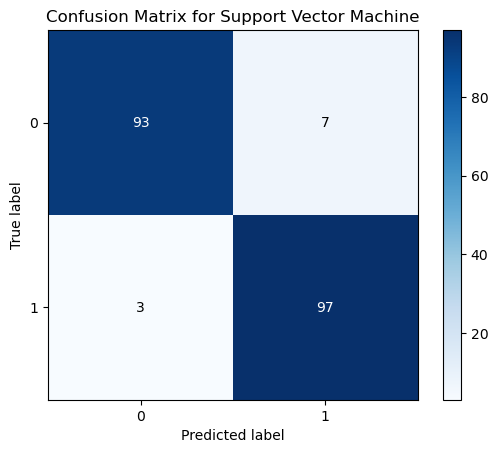

In [48]:
accuracy, X_train, X_test, y_train, pred_y = train_model_predict(clf_svm, "Support Vector Machine", X, y, skf)
print("Model accuracy= ", accuracy*100, "%\n")
print("Dataset labels: ", data_labels.unique())
print("Dataset numeric labels after encoding for model: ", data_downsample['label'].unique())